### Final Proposal: Informing Fire Safety Inspections

Investigating commercial building characteristics in Peoria, Illinois and their relationship to an established fire risk score (OVAP Score).

#### Problem Statement

The Peoria Fire Department (PFD) conducts regular inspections of non-residential buildings to assess whether they are in compliance with local fire safety code. These inspections are meant to catch fire code violations before they result in a building fire and put the lives of building occupants in danger. Every inspection generates a fire risk score called an OVAP score.

The PFD does not currently have a mechanism or process for prioritizing fire inspections of non-residential buildings. In addition, inspectors currently face a substantial backlog of buildings that have not been recently inspected. This preliminary investigation is seeking to establish a model to better prioritize these inspections.

We will merge data sets that include various characteristics of commercial buildings and their current OVAP score. The goal of our data science model will be to predict what a given commercial property's OVAP score will be, helping to prioritize future inspections of commercial buildings in the hope of identifying buildings before a fire incident occurs.

#### Hypothesis

We expect that higher OVAP scores will be related to higher building square footage, greater building age, occupancy type, building construction material, whether it is a piece of critical infrastructure, NFIRS code, and building height. 

#### Assumptions

- Fire Inspections reports that have been carried out are complete with quality data.
- OVAP scores will be able to calculate risk according to the below list:
(Low OVAP Score indicates low risk of fire, high OVAP score indicates high risk fire)
Maximum: 60 or more
Significant: 40 to 59
Moderate: 15 to 39
Low: 14 or less

#### Goals:
1. Identify to what degree various building characteristics impact the OVAP score:
Building a predictive model based on a number of parameters including building square footage, building age, occupancy type, building construction material, whether it is a piece of critical infrastructure, NFIRS code, and building height that assigns a risk assessment to each non-residential building in the City of Peoria. 

#### Success Metrics: 
- Efficacy of our model to ‘successfully’ highlight properties or zones at highest risk of fire
- Successful if the slate of properties our model predicts/prioritizes actually return an OVAP score, close to what we predicted given the data we have from 2017, upon human inspection. 
- PFD continues to pursue predictive analytics that account for building characteristics to prioritize inspections
- Improved data collection and standardization practices.

#### Risks:
1. Our small data set may not be generalizable to other fire-related data that the PFD has.

2. We may just be able to get all the data sets that we need, clean them, organize them, and try creating a basic (imperfect) model to start with and learn from. 

3. A good model that improves performance can cause us to begin collecting biased data. For example, if the model initially identifies that buildings with deep fryers are more likely to have incidents of fires, those types of buildings would be inspected more often. If fire incidents at these buildings go down, our model would begin to tell inspectors that those types of buildings are less likely to cause fires, even while that may not be true. (This is a consideration that should impact how our model is inserted into the inspection process. We might be able to avoid this issue by using our model to complement inspectors current process, rather than replace it.)

#### Limitations:
1. Possible Limitation: As mentioned above, the project we have in mind for our predictive model may be hindered most heavily by time. For example, our model would need to be re-evaluated and re-adjusted multiple times before implementation as a full replacement could happen. If inspectors plan to use this model to supplement their efforts then decreasing bias, among other factors, will be our top priority to ensure reliable and consistent results. 

Approach to Limitation: Our approach to this limitation is to create a predictive model for our project that may inform new prioritization techniques in hopes of strengthening the efficiency of the inspection process.

2. Possible Limitation: Another major limitation would be the size and scale of our training data set. For example, if we train our model from inspections collected only in 2017 then faults and errors will arise most definitely when we apply the model moving forward. 

#### Data Sets Used

##### Fire Inspections (2017)
Catalogues inspection results for non-residential buildings
Why: Inspection results give us characteristics about buildings, such as square footage, building material type, and occupancy type.
Peoria Fire Department

###### OVAP Scores (2017)
The result of an inspection is an OVAP score, which describes the fire risk of a building.
Why: Knowing how building characteristics impact an OVAP score will allow us to predict the OVAP scores of buildings that haven't been inspected.
Peoria Fire Department
 

#### Expected Challenges
#1. Scaling Data Collection / Access
In keeping the scope small, within Peoria, we don’t anticipate any trouble acquiring or accessing relevant data. However, if we ever look to scale, acquiring testing data from other communities may prove more challenging.
#2. Data Uniformity
In collecting data from a couple of different partners, we anticipate a need to do some data cleaning to ensure databases are formatted similarly and line up for valid analyses. (VALIDATED)

##### Case Studies
New Orleans - predicted fire risk to help their Fire Department prioritize where to install smoke detectors
Article: https://datasmart.ash.harvard.edu/news/article/predicting-fire-risk-from-new-orleans-to-a-nationwide-tool-846
Report: http://nola.gov/performance-and-accountability/nolalytics/files/full-report-on-analytics-informed-smoke-alarm-outr/ 
Code (written in R, a different programming language, but the logic would still help us re-create it in Python): https://github.com/cno-opa/smoke-alarm-outreach
Data Used: American Housing Survey (available), American Census Survey (available to us), Property Data (available to us), Fire Incident Data (available to us)

###### Pittsburg - predicting fire risk to help Fire Department prioritize fire safety inspections 
Article: http://www.govtech.com/data/Pittsburgh-Uses-Data-to-Predict-Fire-Risk.html   
Report: http://michaelmadaio.com/Metro21_FireRisk_FinalReport.pdf 
Code: https://github.com/CityofPittsburgh/fire_risk_analysis 
Data Used: Property Data (available to us), Permits, Licenses and Inspections Data (available to us), Fire Incident Data (available to us)

## STEP 1: Merge the data sets below into one clean data set that can be used to perform basic exploratory data analysis.

### Data Sets Used

**Fire Inspections Notes (2017)**
Catalogues inspection results for non-residential buildings Why: How long ago an inspection occured may impact the risk of a fire in the near future.
Peoria Fire Department

**OVAP Scores (2017)**
OVAP scores inform the Fire Department to what extent a building might be likely to have a fire incident. The OVAP scores have only been generated since new software was implemented in 2017.
Peoria Fire Department

Note: Although Fire Inspection notes and OVAP scores are connected, they cannot currently be exported to a single data set.

**Building Characteristics**
Catalogues several characteristics of all buildings, such as year built, square footage, etc. Why: Some building characteristics may impact the risk of a fire in the future. For example, older buildings may contain knob-and-tube electrical wiring, which is less safe than modern electrical wiring.
Peoria County GIS Department / City of Peoria Information Systems Department

### __Names of the datasets that we're working with:__

1. commercial_building_list.csv - commercial buildings in the city with firezone id and firestation (Building Characteristics)
2. inspection_data_2017.csv - fire inspections in 2017, pulled from current Peoria Fire Department tool (Fire Inspections)
3. commercial_with_OVAP_score.csv - commercial buildings that have OVAP scores, pulled from current Peoria Fire Department Tool (OVAPs)



In [1]:
## 1. Import all 3 data sets to take a look at their columns

import pandas as pd
from pathlib import Path

## 1.a Set path for data sets

inspections_path = Path('.', 'data', 'inspection_data_2017.csv')
buildings_path = Path('.', 'data', 'commercial_property_list.csv')
OVAP_path = Path('.', 'data', 'commercial_with_OVAP_score.csv')

## 1.b Store data in variables as dataframes

inspections = pd.read_csv(inspections_path)
buildings = pd.read_csv(buildings_path)
OVAP = pd.read_csv(OVAP_path)

## 1.c Take a look at how the 3 dataframes display address information, which
## is the column we thought we wanted to join them on originally.

print(buildings.loc[:,'full_address'].head())
print(inspections.loc[:, 'Address1'].head())
print(OVAP.loc[:, 'Address'].head())

0           100 WALNUT ST
1         400 SW WATER ST
2             SW WATER ST
3    512 SW WASHINGTON ST
4         542 SW ADAMS ST
Name: full_address, dtype: object
0    4700 N University ST #60
1             100 State ST #A
2              1024 W MAIN ST
3        2607 N University ST
4           100 Alexander AVE
Name: Address1, dtype: object
0      8875 N Knoxville AVE
1          Peoria, IL 61615
2    2200 W War Memorial DR
3                    #DU19A
4          Peoria, IL 61613
Name: Address, dtype: object


In [2]:
## 2. Clean the dataframes - Removing Columns

## 2.a Remove unnecessary columns in buildings dataframe

buildings.drop(['street_number', 'street_directionality', 'street_name', 'street_type', 'owner_middleinitial'], axis=1, inplace=True)
print(buildings.columns)

## 2.b Remove unnecessary columns in OVAP dataframe

OVAP.drop(['NFF GPM', 'Flow Available'], axis=1, inplace=True)
print(OVAP.columns)

## 2.c Remove unnecessary columns in inspections dataframe - based on Roland's recommendations

inspections.drop(['Subcategory',
       'Email', 'Phone', 'FAX', 'OccupancyNotes', 'MapPage',
       'FireAlarmPanelLoc', 'MasterKeyLoc',
       'BasementPresent', 'Width', 'Length', 'GasLPGShutoffLoc',
       'ElectricalPanelLoc', 'FDConnections', 'SprinklerRoomLoc',
       'OtherLocInfo', 'WaterSupplyInfo', 'ExposureInfo', 'HazMat',
       'BuildingAccess', 'AccessProblems', 'VentilationProblems',
       'TimeNormallyOccupied', 'PrePlanNotes', 'UserOccupancyID',
       'LicenseNumber', 'NumberOfUnits', 'OccupancyLoad', 'UBCode', 'NFPACode',
       'IBCode', 'AssessorParcelNumber', 'NumberMilepost',
       'StreetPrefixDirection', 'StreetOrHighwayName', 'StreetType',
       'StreetSuffix', 'AptOrSuite', 'ISOID', 'Latitude',
       'BuildingNumber', 'Longitude',
       'AssessedValue', 'NationalGrid',
       'UtilityBillingNumber', 'RoofTypeId', 'RoofMaterialId',
       'RoofConstructionId', 'StationID', 'DispatchID',
       'Population DensityID'], axis=1, inplace=True)
print(inspections.columns)

Index(['feature_ID', 'lower_PIN', 'PIN', 'owner_name', 'owner_address',
       'owner_address2', 'owner_city', 'owner_state', 'full_address', 'city',
       'state', 'zipcode', 'tax_code', 'first_name', 'last_name',
       'firestation', 'firezone'],
      dtype='object')
Index(['Occupancy Name', 'Address', 'OVAP Score'], dtype='object')
Index(['Name', 'Address1', 'Address2', 'City', 'State', 'Zip', 'OccupancyType',
       'BuildingHeight', 'NumberOfFloors', 'SquareFeet',
       'CriticalInfrastructure', 'YearBuilt', 'NFIRSPropertyUse',
       'ConstructionTypeId'],
      dtype='object')


In [3]:
## 3. Clean the dataframes - Adding columns

## 3.a view the OVAP score data set

OVAP.head()

## For every inspection in The OVAP Score data set, there is row for the address,
## another rows with City, State, ZIP and, if relevant, a third row with Unit information. 
## To clean up the OVAP dataframe, we need to remove City, State, and ZIP. 
## Then, we need to add a column to the row with the inspection and address that will denote the building's unit,
## if it exists.

,Occupancy Name,Address,OVAP Score
0,Academy of Okinawan Karate,8875 N Knoxville AVE,0.00
1,NaN,"Peoria, IL 61615",NaN
2,the former Napoli's Pizza,2200 W War Memorial DR,29.46
3,NaN,#DU19A,NaN
4,NaN,"Peoria, IL 61613",NaN


In [4]:
## 3.b Add a "Unit" column to the OVAP data set and fill it with placeholder values 'NaN'.

OVAP.insert(2, 'Unit', 'NaN')
OVAP.head()

,Occupancy Name,Address,Unit,OVAP Score
0,Academy of Okinawan Karate,8875 N Knoxville AVE,NaN,0.00
1,NaN,"Peoria, IL 61615",NaN,NaN
2,the former Napoli's Pizza,2200 W War Memorial DR,NaN,29.46
3,NaN,#DU19A,NaN,NaN
4,NaN,"Peoria, IL 61613",NaN,NaN


In [5]:
## 4. Clean the dataframes - Consolidate Unit number into proper address row.

## 4.a Write a for loop to move unit information from 'Address' column to previous row's 'Unit' column.

## Find number of rows in OVAP by saving the rows from .shape to a variable OVAP_row_length
OVAP_row_length = OVAP.shape[0]

## Create a copy of the OVAP to work with moving forward
OVAP_clean = OVAP

## Go through all rows in OVAP_clean
for row in range(0, OVAP_row_length):
    
    ## If row's Occupancy Name is a str, this means it is a row with an inspection - skip this row
    if type(OVAP_clean.loc[row, 'Occupancy Name']) == str:
        pass
    
    ## Else, the row is not an inspection row, but a row that contains either 1) city, state and zip
    ## or 2) unit information. Check to see if '#' is in the Address column of this row - if true, 
    ## this must be a row with a Unit number.
    else:
        if '#' in OVAP_clean.loc[row, 'Address']:
            
            ## If true, this is a Unit number and is moved to the previous row's Unit column.
            ## Then, drop this column.
            OVAP_clean.loc[row-1, 'Unit'] = OVAP_clean.loc[row, 'Address']
            OVAP_clean.drop(row, inplace=True)
            
        ## Else, this is City, State, and ZIP and is not needed, so it is dropped.    
        else:
            OVAP_clean.drop(row, inplace=True)
            
## See the resulting dataframe        
OVAP_clean.head(20)


,Occupancy Name,Address,Unit,OVAP Score
0,Academy of Okinawan Karate,8875 N Knoxville AVE,NaN,0.00
2,the former Napoli's Pizza,2200 W War Memorial DR,#DU19A,29.46
5,(Office w/ Unkown name),701 Main ST,#7,29.46
8,(vacant mercantile),2200 W War Memorial DR,#DU08,21.02
11,1505 on the Avenue Apartments,1505 N Peoria AVE,NaN,39.11
13,311 SW Water,311 SW Water ST,NaN,33.00
15,401 Management Office,401 SW Water ST,#201,31.53
18,401 Water - CAFE 401,401 SW Water ST,#102,30.31
22,401 Water - Hodges Loizzi Eisenhammer,401 SW Water ST,#106,30.55
25,401 Water - VOLT,401 SW Water ST,#101,27.13


In [6]:
## Collapse multiple units into single address and assign the maximum OVAP value of same addresses to single address.
## In the future, we could add additional features to this collapsing. OVAP score is an aggregate of all these features.

simplified_OVAP = OVAP_clean.groupby('Address')[['Occupancy Name','OVAP Score']].max()
simplified_OVAP = simplified_OVAP.reset_index()
simplified_OVAP

,Address,Occupancy Name,OVAP Score
0,1 Aloha LN,Maui Jim,28.60
1,1 Elks DR,Els Lodge #20,31.41
2,100 Alexander AVE,Alexander Street Steakhouse,32.51
3,100 State ST,S & H Floor Covering,28.60
4,1000 W Albany AVE,St Philomena Church,36.67
5,1000 W main ST,Whalen's Auto Center,35.57
6,1005 NE Jefferson AVE,Human Service Center,26.00
7,1006 W main ST,Stecher's Automotive,33.73
8,1009 N Sheridan RD,Big Top TAT2,26.33
9,1010 W Johnson ST,Rogy's South Side Catholic Child Care Center,0.00


In [7]:
## At this point, we decided we will be joining on Name, so we drop the 'Address' and 'Unit' Columns

simplified_OVAP.drop(['Address'], axis=1, inplace=True)
simplified_OVAP

,Occupancy Name,OVAP Score
0,Maui Jim,28.60
1,Els Lodge #20,31.41
2,Alexander Street Steakhouse,32.51
3,S & H Floor Covering,28.60
4,St Philomena Church,36.67
5,Whalen's Auto Center,35.57
6,Human Service Center,26.00
7,Stecher's Automotive,33.73
8,Big Top TAT2,26.33
9,Rogy's South Side Catholic Child Care Center,0.00


In [8]:
## Change name of first column in OVAP_clean to 'Name'

simplified_OVAP.columns = ['Name', 'OVAP Score']
simplified_OVAP

,Name,OVAP Score
0,Maui Jim,28.60
1,Els Lodge #20,31.41
2,Alexander Street Steakhouse,32.51
3,S & H Floor Covering,28.60
4,St Philomena Church,36.67
5,Whalen's Auto Center,35.57
6,Human Service Center,26.00
7,Stecher's Automotive,33.73
8,Big Top TAT2,26.33
9,Rogy's South Side Catholic Child Care Center,0.00


In [9]:
inspections

,Name,Address1,Address2,City,State,Zip,OccupancyType,BuildingHeight,NumberOfFloors,SquareFeet,CriticalInfrastructure,YearBuilt,NFIRSPropertyUse,ConstructionTypeId
0,50's Dinner,4700 N University ST #60,NaN,Peoria,IL,61614,A-2 Restaurants,NaN,NaN,NaN,NaN,NaN,161,Ordinary (Joisted Masonry) Class III
1,8 Bit Beercade,100 State ST #A,NaN,Peoria,IL,61602,A-2 taverns and Bars,NaN,1.0,1900.0,NaN,NaN,113,Ordinary (Joisted Masonry) Class III
2,A WORLD OF WINGS,1024 W MAIN ST,NaN,PEORIA,IL,61606,A-2 Restaurants,NaN,1.0,2000.0,NaN,NaN,161,Ordinary (Joisted Masonry) Class III
3,Agatucci's,2607 N University ST,NaN,Peoria,IL,61614,A-2 Restaurants,NaN,NaN,NaN,NaN,NaN,161,Ordinary (Joisted Masonry) Class III
4,Alexander Street Steakhouse,100 Alexander AVE,NaN,Peoria,IL,61603,A-2 Restaurants,NaN,2.0,20000.0,NaN,NaN,161,Heavy Timber Class IV
5,Amy's on Adams,4201 SW Adams ST,NaN,Peoria,IL,61605,A-2 Night Clubs,NaN,1.0,1500.0,NaN,NaN,162,Ordinary (Joisted Masonry) Class III
6,Anchors Away,4100 W Willow Knolls DR #C-12,NaN,Peoria,IL,61615,A-2 Restaurants,16.0,1.0,3300.0,NaN,NaN,161,Non-Combustible (All Metal) Class II
7,Antonio's Restaurant,320 Liberty ST,NaN,Peoria,IL,61602,A-2 Restaurants,NaN,NaN,NaN,NaN,NaN,519,Non-Combustible (Masonry) Class I
8,Apollo Theater,311 Main ST #E,NaN,Peoria,IL,61602,A-1 Theaters,NaN,3.0,25000.0,NaN,NaN,180,Wood Frame Class V
9,Applebee's Neighborhood Grill & Bar,3929 W War Memorial DR,NaN,Peoria,IL,61604,A-2 Restaurants,25.0,1.0,5250.0,NaN,NaN,161,Ordinary (Joisted Masonry) Class III


In [10]:
## 5. Join Dataframes - results in 5,260 rows

clean_data_set = pd.merge(simplified_OVAP, inspections, how='inner', on='Name')

print(clean_data_set.shape)

## Drop duplicates - results in 644 rows

clean_data_set = clean_data_set.drop_duplicates(subset='Name', keep='first')

print(clean_data_set.shape)



(5260, 15)
(644, 15)


In [11]:
## Our data set still has some missing values, such as OVAP Scores that are 0, Square Footage values that are 0,
## Square Footage values that are missing altogether, Construction Type IDs, and Year Built values
## that are missing altogether.

print((clean_data_set.loc[:, 'OVAP Score'] == 0).sum())
print((clean_data_set.loc[:, 'SquareFeet'] == 0).sum())
print(clean_data_set.loc[:,'SquareFeet'].isnull().sum())
print(clean_data_set.loc[:,'YearBuilt'].isnull().sum())
print(clean_data_set.loc[:,'ConstructionTypeId'].isnull().sum())

clean_data_set.shape

66
19
14
532
13


(644, 15)

In [12]:
## AN ASIDE: Extract a super-true data set with only rows that contain all the values for SquareFeet and YearBuilt.
## To see what happens when we run a linear regression model using super_true_data, take a look at 
## 'Project Description and Data Cleaning (Super True Data).ipynb'

super_true_data = clean_data_set.loc[((clean_data_set.loc[:,'SquareFeet'].notnull()) &
                                     (clean_data_set.loc[:,'YearBuilt'].notnull()) &
                                     (clean_data_set.loc[:, 'OVAP Score'] != 0) &
                                     (clean_data_set.loc[:, 'SquareFeet'] != 0)),:]

super_true_data.shape

(103, 15)

In [13]:
## Find the median of existing SquareFeet values

median_SquareFeet = clean_data_set.loc[(clean_data_set.loc[:,'SquareFeet'].notnull()) &
                   (clean_data_set.loc[:,'SquareFeet'] > 0.00), 'SquareFeet'].median()
print('Median Square Footage is:', median_SquareFeet)


Median Square Footage is: 6000.0


In [14]:
## Replace SquareFeet values that are null with the median, which is 6,000.

clean_data_set.loc[:, 'SquareFeet'].fillna(value=median_SquareFeet, inplace=True)

## Replace SquareFeet values that are 0 with the median, which is 6,000.

clean_data_set.replace({'SquareFeet':{0: median_SquareFeet}}, inplace=True)

In [15]:
## Find the average of existing OVAP Score values, ignoring those that are 0.

average_OVAP = clean_data_set.loc[(clean_data_set.loc[:,'OVAP Score'] > 0.00), 'OVAP Score'].mean()
print('Average OVAP Score is:', average_OVAP)

Average OVAP Score is: 31.24782006920415


In [16]:
## Replace OVAP SCore values that are 0 with the average, which is 31.24.

clean_data_set.replace({'OVAP Score':{0: average_OVAP}}, inplace=True)

In [17]:
## Find the average year a building was built in our data set, which was 1968.

average_YearBuilt = round(clean_data_set.loc[(clean_data_set.loc[:, 'YearBuilt'].notnull()), 'YearBuilt'].mean())
print('Average Year Built is:', average_YearBuilt)

## Fill in missing YearBuilt values with the average year built value

clean_data_set.loc[(clean_data_set.loc[:, 'YearBuilt'].isnull()), 'YearBuilt'] = average_YearBuilt

Average Year Built is: 1968


In [18]:
## Find the most common construction type id, which is 'Ordinary (Joisted Masonry) Class III'

most_common_type = ((clean_data_set.loc[:, 'ConstructionTypeId'].value_counts()).reset_index()).iloc[0,0]
print('Most Common Construction Type ID is:', most_common_type)

## Fill in missing ConstructionTypeId values with the most common construction type id

clean_data_set.loc[(clean_data_set.loc[:, 'ConstructionTypeId'].isnull()), 'ConstructionTypeId'] = most_common_type## Change SquareFeet to measure in Thousands

super_true_data.loc[:, 'SquareFeetK'] = (super_true_data.loc[:, 'SquareFeet'] / 1000)

Most Common Construction Type ID is: Ordinary (Joisted Masonry) Class III


C:\Users\theho\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\theho\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [19]:
## Change SquareFeet to measure in Thousands

clean_data_set.loc[:, 'SquareFeetK'] = (clean_data_set.loc[:, 'SquareFeet'] / 1000)

In [20]:
## Check to see whether all values have been filled in

print((clean_data_set.loc[:, 'OVAP Score'] == 0).sum())
print((clean_data_set.loc[:, 'SquareFeet'] == 0).sum())
print(clean_data_set.loc[:,'SquareFeet'].isnull().sum())
print(clean_data_set.loc[:,'YearBuilt'].isnull().sum())
print(clean_data_set.loc[:,'ConstructionTypeId'].isnull().sum())

0
0
0
0
0


In [21]:
## Add a new feature column 'BuildingAge' that uses 'YearBuilt' to determine how many years have passed
## between the year the building was built and 2017, the year the data was collected.

clean_data_set.loc[:, 'BuildingAge'] = 2017 - clean_data_set.loc[:, 'YearBuilt']

clean_data_set

,Name,OVAP Score,Address1,Address2,City,State,Zip,OccupancyType,BuildingHeight,NumberOfFloors,SquareFeet,CriticalInfrastructure,YearBuilt,NFIRSPropertyUse,ConstructionTypeId,SquareFeetK,BuildingAge
0,Maui Jim,28.60000,1 Aloha LN,NaN,Peoria,IL,61614,B- Business,NaN,1.0,1250001.0,NaN,1968.0,569,Non-Combustible (All Metal) Class II,1250.001,49.0
1,Els Lodge #20,31.41000,1 Elks DR,NaN,Peoria,IL,61604,A-2 Restaurants,NaN,2.0,8500.0,NaN,1968.0,NaN,Wood Frame Class V,8.500,49.0
2,Alexander Street Steakhouse,32.51000,100 Alexander AVE,NaN,Peoria,IL,61603,A-2 Restaurants,NaN,2.0,20000.0,NaN,1968.0,161,Heavy Timber Class IV,20.000,49.0
3,S & H Floor Covering,28.60000,100 State ST #216,NaN,Peoria,IL,61602,B- Business,NaN,1.0,1200.0,NaN,1968.0,599,Heavy Timber Class IV,1.200,49.0
4,St Philomena Church,36.67000,1000 W Albany AVE,NaN,Peoria,IL,61614,A-3 Churches,NaN,1.0,12600.0,NaN,1953.0,131,Ordinary (Joisted Masonry) Class III,12.600,64.0
5,Whalen's Auto Center,35.57000,1000 W main ST #auto,NaN,Peoria,IL,61606,M-Motor Vehicle Service Stations,NaN,1.0,850.0,NaN,1968.0,579,Wood Frame Class V,0.850,49.0
6,Human Service Center,26.00000,130 Richard Pryor PL,NaN,Peoria,IL,61605,I- Adult Care,15.0,1.0,5000.0,NaN,1968.0,322,Ordinary (Joisted Masonry) Class III,5.000,49.0
15,Stecher's Automotive,33.73000,1006 W main ST,NaN,Peoria,IL,61606,M-Motor Vehicle Service Stations,NaN,1.0,10000.0,NaN,1968.0,579,Non-Combustible (Masonry) Class I,10.000,49.0
16,Big Top TAT2,26.33000,1009 N Sheridan RD,NaN,Peoria,IL,61614,B- Business,NaN,3.0,1650.0,NaN,1968.0,557,Wood Frame Class V,1.650,49.0
17,Rogy's South Side Catholic Child Care Center,31.24782,1010 W Johnson ST,NaN,Peoria,IL,61605,E- Day care through 12th grade,NaN,0.0,6000.0,NaN,1968.0,NaN,Ordinary (Joisted Masonry) Class III,6.000,49.0


In [ ]:
## Export final clean data set to a .csv file in the 'data' directory

##clean_data_set.to_csv('data/march18_fire_data.csv')

In [22]:
## Predict OVAP Score from Square Footage

from sklearn.linear_model import LinearRegression                                 

# Make an instance of the LinearRegression class.
lr = LinearRegression()


# Set square footage to our X variable and what we want to predict, our OVAP score, to our y
X = clean_data_set.loc[:, ['SquareFeetK']]
y = clean_data_set.loc[:, ['OVAP Score']]


lr.fit(X, y)

clean_data_set.loc[:, 'predictions'] = lr.predict(X)
clean_data_set.loc[:, 'average_OVAP'] = clean_data_set.loc[:, 'OVAP Score'].mean()
clean_data_set.head(50)

,Name,OVAP Score,Address1,Address2,City,State,Zip,OccupancyType,BuildingHeight,NumberOfFloors,SquareFeet,CriticalInfrastructure,YearBuilt,NFIRSPropertyUse,ConstructionTypeId,SquareFeetK,BuildingAge,predictions,average_OVAP
0,Maui Jim,28.60000,1 Aloha LN,NaN,Peoria,IL,61614,B- Business,NaN,1.0,1250001.0,NaN,1968.0,569,Non-Combustible (All Metal) Class II,1250.001,49.0,37.524734,31.24782
1,Els Lodge #20,31.41000,1 Elks DR,NaN,Peoria,IL,61604,A-2 Restaurants,NaN,2.0,8500.0,NaN,1968.0,NaN,Wood Frame Class V,8.500,49.0,31.136121,31.24782
2,Alexander Street Steakhouse,32.51000,100 Alexander AVE,NaN,Peoria,IL,61603,A-2 Restaurants,NaN,2.0,20000.0,NaN,1968.0,161,Heavy Timber Class IV,20.000,49.0,31.195298,31.24782
3,S & H Floor Covering,28.60000,100 State ST #216,NaN,Peoria,IL,61602,B- Business,NaN,1.0,1200.0,NaN,1968.0,599,Heavy Timber Class IV,1.200,49.0,31.098556,31.24782
4,St Philomena Church,36.67000,1000 W Albany AVE,NaN,Peoria,IL,61614,A-3 Churches,NaN,1.0,12600.0,NaN,1953.0,131,Ordinary (Joisted Masonry) Class III,12.600,64.0,31.157219,31.24782
5,Whalen's Auto Center,35.57000,1000 W main ST #auto,NaN,Peoria,IL,61606,M-Motor Vehicle Service Stations,NaN,1.0,850.0,NaN,1968.0,579,Wood Frame Class V,0.850,49.0,31.096755,31.24782
6,Human Service Center,26.00000,130 Richard Pryor PL,NaN,Peoria,IL,61605,I- Adult Care,15.0,1.0,5000.0,NaN,1968.0,322,Ordinary (Joisted Masonry) Class III,5.000,49.0,31.118110,31.24782
15,Stecher's Automotive,33.73000,1006 W main ST,NaN,Peoria,IL,61606,M-Motor Vehicle Service Stations,NaN,1.0,10000.0,NaN,1968.0,579,Non-Combustible (Masonry) Class I,10.000,49.0,31.143840,31.24782
16,Big Top TAT2,26.33000,1009 N Sheridan RD,NaN,Peoria,IL,61614,B- Business,NaN,3.0,1650.0,NaN,1968.0,557,Wood Frame Class V,1.650,49.0,31.100872,31.24782
17,Rogy's South Side Catholic Child Care Center,31.24782,1010 W Johnson ST,NaN,Peoria,IL,61605,E- Day care through 12th grade,NaN,0.0,6000.0,NaN,1968.0,NaN,Ordinary (Joisted Masonry) Class III,6.000,49.0,31.123256,31.24782


In [23]:
## Predict OVAP Score from Square Footage and Building Age

## Make an instance of the LinearRegression class.
lr1 = LinearRegression()

## Make a list of feature columns that includes Square Feet and Building Age
feature_cols = ['SquareFeetK', 'BuildingAge']

# Set our feature columns to our X variable and what we want to predict, our OVAP score, to our y
X1 = clean_data_set.loc[:, feature_cols]
y1 = clean_data_set.loc[:, ['OVAP Score']]

lr1.fit(X1, y1)

clean_data_set.loc[:, 'predictions_2_features'] = lr1.predict(X1)

In [24]:
from sklearn import metrics
import numpy as np

y_pred = clean_data_set.loc[:, 'predictions']
y_pred_2_features = clean_data_set.loc[:, 'predictions_2_features']
y_mean = clean_data_set.loc[:, 'average_OVAP']

print('MSE of Using mean OVAP Score is',np.sqrt(metrics.mean_squared_error(y, y_mean)))
print('MSE of Using Square Footage is', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('MSE of Using Square Footage and Building Age is', np.sqrt(metrics.mean_squared_error(y, y_pred_2_features)))

MSE of Using mean OVAP Score is 5.02290026791
MSE of Using Square Footage is 4.98110859935
MSE of Using Square Footage and Building Age is 4.97780234029


In [25]:
## View coefficients for linear regression model that uses Square Footage and Building Age

print(feature_cols)
print(lr1.coef_.tolist())

['SquareFeetK', 'BuildingAge']
[[0.0051350467150580925, 0.007498844442395261]]


# WTF

(0, 500)

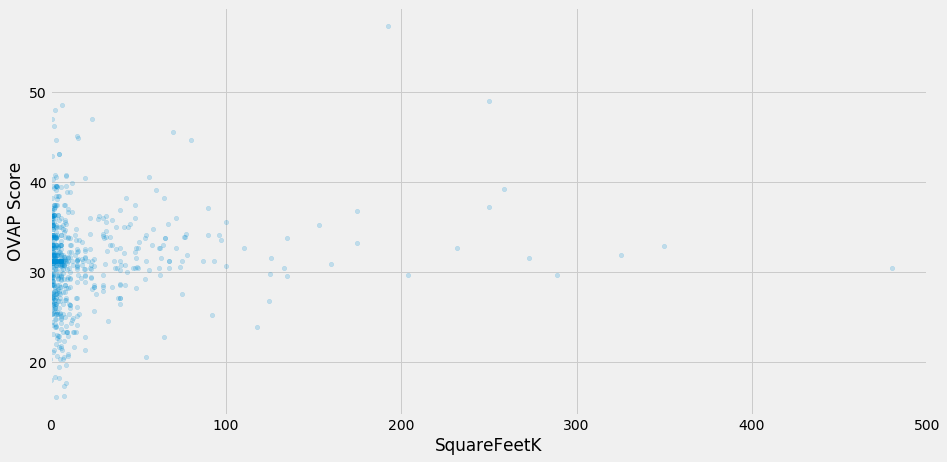

In [28]:
## Visualize the data

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
plt.style.use("fivethirtyeight")

## Create a scatter plot of Square Footage against OVAP Score
## Need Regression Line
clean_data_set.plot(kind='scatter', x='SquareFeetK', y='OVAP Score', alpha=0.2, figsize=(14,7)).set_xlim(0, 500)

# Logistic Regression

In [1]:
# Logistic Regression: Number of Floors vs OVAPrank(below mean=0 and above mean=1)
# Introductory Import
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
# Here I import the data using pd.read_csv.
df_path = Path('.', 'data', 'super_true_fire_data.csv')
df = pd.read_csv(df_path)
df.head()

,Unnamed: 0,Name,OVAP Score,Address1,Address2,City,State,Zip,OccupancyType,BuildingHeight,...,SquareFeet,CriticalInfrastructure,YearBuilt,NFIRSPropertyUse,ConstructionTypeId,BuildingAge,SquareFeetK,predictions,average_OVAP,predictions_2_features
0,4,St Philomena Church,36.67,1000 W Albany AVE,NaN,Peoria,IL,61614,A-3 Churches,NaN,...,12600.0,NaN,1953.0,131.0,Ordinary (Joisted Masonry) Class III,64.0,12.6,30.973998,31.592718,31.083898
1,19,Lakeview Recreational Center,27.13,1013 W Lake AVE,NaN,Peoria,IL,61614,A-3 Exhibition Halls,20.0,...,40000.0,NaN,1970.0,120.0,Non-Combustible (All Metal) Class II,47.0,40.0,31.318906,31.592718,31.300921
2,24,Owens Recreational Center,30.68,1019 W Lake AVE,NaN,Peoria,IL,61614,A-4 Skating Rinks,NaN,...,100000.0,NaN,1980.0,114.0,Non-Combustible (Masonry) Class I,37.0,100.0,32.074181,31.592718,31.978404
3,42,Verizon Digital Store,30.68,10408 N Centerway DR #I & J,NaN,Peoria,IL,61615,B- Business,22.0,...,3300.0,NaN,2016.0,580.0,Non-Combustible (All Metal) Class II,1.0,3.3,30.856930,31.592718,30.499376
4,44,St Jude Catholic School,31.90,10811 N Knoxvillle AVE,NaN,Peoria,IL,61615,E- Day care through 12th grade,NaN,...,78200.0,NaN,2013.0,213.0,Wood Frame Class V,4.0,78.2,31.799764,31.592718,31.460120


In [4]:
# I am observing what columns exist within my dataset.
list(df)

['Unnamed: 0',
 'Name',
 'OVAP Score',
 'Address1',
 'Address2',
 'City',
 'State',
 'Zip',
 'OccupancyType',
 'BuildingHeight',
 'NumberOfFloors',
 'SquareFeet',
 'CriticalInfrastructure',
 'YearBuilt',
 'NFIRSPropertyUse',
 'ConstructionTypeId',
 'BuildingAge',
 'SquareFeetK',
 'predictions',
 'average_OVAP',
 'predictions_2_features']

In [5]:
# Removing all rows with a null value under the OVAP Score column becuase I wanted to clean the dataframe.
df = df[np.isfinite(df['OVAP Score'])]

In [6]:
# Calculated the mean of each column, because I am looking for OVAP Score average value.
df.mean()

Unnamed: 0                 2881.737864
OVAP Score                   31.592718
Address2                           NaN
Zip                       61608.796117
BuildingHeight               22.333333
NumberOfFloors                1.990291
SquareFeet                61752.009709
YearBuilt                  1967.407767
NFIRSPropertyUse            344.470588
BuildingAge                  49.592233
SquareFeetK                  61.752010
predictions                  31.592718
average_OVAP                 31.592718
predictions_2_features       31.592718
dtype: float64

In [7]:
# Create a binary-populated column called OVAPrank to split OVAP Score values between.. 
# ...the mean.
df['OVAPrank'] = np.where(df['OVAP Score']>=31.60, '1', '0')
df

,Unnamed: 0,Name,OVAP Score,Address1,Address2,City,State,Zip,OccupancyType,BuildingHeight,...,CriticalInfrastructure,YearBuilt,NFIRSPropertyUse,ConstructionTypeId,BuildingAge,SquareFeetK,predictions,average_OVAP,predictions_2_features,OVAPrank
0,4,St Philomena Church,36.67,1000 W Albany AVE,NaN,Peoria,IL,61614,A-3 Churches,NaN,...,NaN,1953.0,131.0,Ordinary (Joisted Masonry) Class III,64.0,12.600,30.973998,31.592718,31.083898,1
1,19,Lakeview Recreational Center,27.13,1013 W Lake AVE,NaN,Peoria,IL,61614,A-3 Exhibition Halls,20.0,...,NaN,1970.0,120.0,Non-Combustible (All Metal) Class II,47.0,40.000,31.318906,31.592718,31.300921,0
2,24,Owens Recreational Center,30.68,1019 W Lake AVE,NaN,Peoria,IL,61614,A-4 Skating Rinks,NaN,...,NaN,1980.0,114.0,Non-Combustible (Masonry) Class I,37.0,100.000,32.074181,31.592718,31.978404,0
3,42,Verizon Digital Store,30.68,10408 N Centerway DR #I & J,NaN,Peoria,IL,61615,B- Business,22.0,...,NaN,2016.0,580.0,Non-Combustible (All Metal) Class II,1.0,3.300,30.856930,31.592718,30.499376,0
4,44,St Jude Catholic School,31.90,10811 N Knoxvillle AVE,NaN,Peoria,IL,61615,E- Day care through 12th grade,NaN,...,NaN,2013.0,213.0,Wood Frame Class V,4.0,78.200,31.799764,31.592718,31.460120,1
5,45,Jim's Steak House,33.00,110 SW Jefferson AVE,NaN,Peoria,IL,61603,A-2 Restaurants,NaN,...,NaN,1990.0,161.0,Non-Combustible (All Metal) Class II,27.0,6.000,30.890917,31.592718,30.726348,1
6,49,Girl Scouts Of Central IL,27.99,1103 W Lake AVE,NaN,Peoria,IL,61614,B- Business,20.0,...,NaN,1967.0,599.0,Ordinary (Joisted Masonry) Class III,50.0,4.000,30.865742,31.592718,30.872145,0
7,61,Noble Center,28.60,1125 W Lake AVE,NaN,Peoria,IL,61614,B- Business,20.0,...,NaN,1960.0,599.0,Non-Combustible (Masonry) Class I,57.0,40.000,31.318906,31.592718,31.375206,0
8,71,The Fieldhouse,33.00,1200 W Main ST #24,NaN,Peoria,IL,61606,A-2 Restaurants,NaN,...,NaN,1992.0,161.0,Non-Combustible (All Metal) Class II,25.0,3.500,30.859448,31.592718,30.680167,1
9,74,Pettengill Morron House,35.57,1212 W Moss AVE,NaN,Peoria,IL,61606,A-3 Museums,50.0,...,NaN,1868.0,NaN,Wood Frame Class V,149.0,8.100,30.917352,31.592718,31.658941,1


In [8]:
# Checking how many counts of rows that lie above or below the mean OVAP Score.
df.loc[:, 'OVAPrank'].value_counts()

0    55
1    48
Name: OVAPrank, dtype: int64

In [9]:
df.loc[:, 'NumberOfFloors'].value_counts()

1.0     46
2.0     33
3.0     18
4.0      4
18.0     1
5.0      1
Name: NumberOfFloors, dtype: int64

In [10]:
# Importing sci-kit logistic regression library package
from sklearn.linear_model import LogisticRegression
# Fitting the model with OVAP Score and Number of Floors.
logreg = LogisticRegression()
X = df.loc[:, ['NumberOfFloors']]
y = df.loc[:,'OVAPrank']
logreg.fit(X,y)
# Creating a column named pred1, then populating pred1 column with predicted values from our model.
df.loc[:, 'pred1'] = logreg.predict(X)

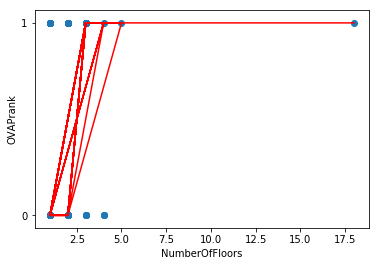

In [11]:
# Displaying scatterplot of Number of Floors versus OVAP Score for initial analysis and...
# ...plotting a line(red) that shows our predictions.
plt.scatter(df.loc[:, 'NumberOfFloors'], df.loc[:, 'OVAPrank'])
plt.plot(df.loc[:,'NumberOfFloors'], df.loc[:, 'pred1'], color='red')
plt.xlabel('NumberOfFloors')
plt.ylabel('OVAPrank')
plt.show()

In [12]:
# Take a look at predicted probabilities
logreg.predict_proba(X)[0:10]

array([[ 0.60882451,  0.39117549],
       [ 0.51544689,  0.48455311],
       [ 0.51544689,  0.48455311],
       [ 0.60882451,  0.39117549],
       [ 0.60882451,  0.39117549],
       [ 0.60882451,  0.39117549],
       [ 0.60882451,  0.39117549],
       [ 0.51544689,  0.48455311],
       [ 0.60882451,  0.39117549],
       [ 0.42097814,  0.57902186]])

In [13]:
# Create a new column called prob1 and populate that new column with the probabilties.
df.loc[:,'prob1']=logreg.predict_proba(X)[:,1]

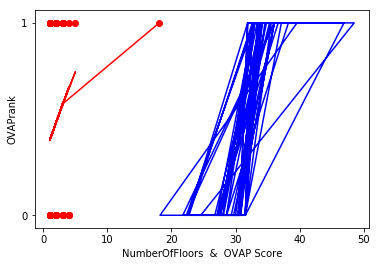

In [14]:
# Plotting probabilities on a scatter plot, with two lines in order to see...
#...outcome.
plt.scatter(df.loc[:, 'NumberOfFloors'], df.loc[:, 'OVAPrank'], color='red')
plt.plot(df.loc[:,'OVAP Score'], df.loc[:, 'OVAPrank'], color='blue')
plt.plot(df.loc[:,'NumberOfFloors'], df.loc[:, 'prob1'], color='red')
plt.xlabel('NumberOfFloors'+'  '+'&'+'  '+'OVAP Score')
plt.ylabel('OVAPrank')
plt.show()

In [15]:
# Observe what outputs appear from sampling my predictive model.
# The first value is the probability of having an OVAP score below the mean..
#...the second value is the probability of having an OVAP score above..
#...the mean.
print(logreg.predict_proba(7))

[[ 0.13693004  0.86306996]]


# ???

In [18]:
# Testing the results on a train-test split
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
X = df.loc[:, ['NumberOfFloors']]
y = df.loc[:, 'OVAPrank']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

LR.fit(X_train,y_train)

y_pred = LR.predict(X_test)
# What does this score represent?
LR.score(X_test, y_test)

0.65384615384615385

In [17]:
# Create an odds column, showing probability(prob1) vs odds
# odds = probability/(1-probability)
# For example, an even dice roll: probability=3/6;  odds=3/3=1
# a dice roll less than 5: probability=4/6; odds=4/2=2
df['odds'] = df.prob1/(1-df.prob1)
df

,Unnamed: 0,Name,OVAP Score,Address1,Address2,City,State,Zip,OccupancyType,BuildingHeight,...,ConstructionTypeId,BuildingAge,SquareFeetK,predictions,average_OVAP,predictions_2_features,OVAPrank,pred1,prob1,odds
0,4,St Philomena Church,36.67,1000 W Albany AVE,NaN,Peoria,IL,61614,A-3 Churches,NaN,...,Ordinary (Joisted Masonry) Class III,64.0,12.600,30.973998,31.592718,31.083898,1,0,0.391175,0.642509
1,19,Lakeview Recreational Center,27.13,1013 W Lake AVE,NaN,Peoria,IL,61614,A-3 Exhibition Halls,20.0,...,Non-Combustible (All Metal) Class II,47.0,40.000,31.318906,31.592718,31.300921,0,0,0.484553,0.940064
2,24,Owens Recreational Center,30.68,1019 W Lake AVE,NaN,Peoria,IL,61614,A-4 Skating Rinks,NaN,...,Non-Combustible (Masonry) Class I,37.0,100.000,32.074181,31.592718,31.978404,0,0,0.484553,0.940064
3,42,Verizon Digital Store,30.68,10408 N Centerway DR #I & J,NaN,Peoria,IL,61615,B- Business,22.0,...,Non-Combustible (All Metal) Class II,1.0,3.300,30.856930,31.592718,30.499376,0,0,0.391175,0.642509
4,44,St Jude Catholic School,31.90,10811 N Knoxvillle AVE,NaN,Peoria,IL,61615,E- Day care through 12th grade,NaN,...,Wood Frame Class V,4.0,78.200,31.799764,31.592718,31.460120,1,0,0.391175,0.642509
5,45,Jim's Steak House,33.00,110 SW Jefferson AVE,NaN,Peoria,IL,61603,A-2 Restaurants,NaN,...,Non-Combustible (All Metal) Class II,27.0,6.000,30.890917,31.592718,30.726348,1,0,0.391175,0.642509
6,49,Girl Scouts Of Central IL,27.99,1103 W Lake AVE,NaN,Peoria,IL,61614,B- Business,20.0,...,Ordinary (Joisted Masonry) Class III,50.0,4.000,30.865742,31.592718,30.872145,0,0,0.391175,0.642509
7,61,Noble Center,28.60,1125 W Lake AVE,NaN,Peoria,IL,61614,B- Business,20.0,...,Non-Combustible (Masonry) Class I,57.0,40.000,31.318906,31.592718,31.375206,0,0,0.484553,0.940064
8,71,The Fieldhouse,33.00,1200 W Main ST #24,NaN,Peoria,IL,61606,A-2 Restaurants,NaN,...,Non-Combustible (All Metal) Class II,25.0,3.500,30.859448,31.592718,30.680167,1,0,0.391175,0.642509
9,74,Pettengill Morron House,35.57,1212 W Moss AVE,NaN,Peoria,IL,61606,A-3 Museums,50.0,...,Wood Frame Class V,149.0,8.100,30.917352,31.592718,31.658941,1,1,0.579022,1.375420


In [ ]:
# Overall I can test the probability of an OVAP score occurring above or below the mean OVAP score...
#...by inputting the number of floors. 
# - 

# Key Conclusions

##### 1. Positive relationship between square footage with OVAP (fire-risk) score 
##### 2. Positive relationship between building age with OVAP (fire-risk) score 
##### 3. As building height/number of floors increase the probabilties 
##### 4. Roland's conclusions? <br>

# Lessons Learned
__1. Data science = hard. Machine learning = hard. Data cleaning is >= hard.__ <br>
__2. Reviewing (and cleaning) data takes a lot of time and consumed much of our initial efforts__<br>
__3. No single dataset contained all the variables needed to run our analyses, so we merged datasets__<br>
__4. The only unique identifier that existed to link records across datasets was building number or company name, sometimes mispelled__<br>
__5. Fields were often missing information; tons of NaN's, zeroes, and incongruous dtypes__<br>
__6. Unique datasets from different city departments encoded multi-tenant properties differently: some having same street number, but multiple units/suites, confounded data and merging efforts__<br>


# Recommendations/Future Directions

__1. Advocate for standardizing data collection and practices (ideally across departments and agencies)__<br>
__2. Improve Inter- and Intra-government datasharing or sharing between agencies to improve decision-making (e.g., code enforcement and fire department)__
    __Integrate data into a centralized hub__<br> 
__3. Continue collaborating as a data science team to build capacity/knowledge for data science and machine learning in Peoria__